# Предобработка данных.

**Подключение библиотек и скриптов**

In [ ]:
import numpy as np
import pandas as pd

**Пути к директориям и файлам**

https://drive.google.com/file/d/1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb

In [ ]:
!wget 'https://drive.google.com/uc?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb' -O housing.csv

--2024-04-11 13:56:48--  https://drive.google.com/uc?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.100, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb [following]
--2024-04-11 13:56:48--  https://drive.usercontent.google.com/download?id=1VKxHc-pMJa5WqSJ1ZJtxdm3ckAvqLAPb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1554964 (1.5M) [application/octet-stream]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.48M  --.-KB/s    in 0.1s    

2024-04-11 13:56:49 (13.8 MB/s) - ‘h

In [ ]:
DATASET_PATH = './housing.csv'
PREPARED_DATASET_PATH = './housing_prepared.csv'

## 1. Загрузка данных

**Описание задачи**

Цель - предсказать стоимость дома

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [ ]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
2963,-119.05,35.33,18.0,12707.0,2685.0,7009.0,2552.0,2.9438,87200.0,INLAND,2963


С помощью .sample можно получить случайную долю объектов, либо перемешать весь датасет

In [ ]:
df.sample(frac=0.8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
9913,-122.30,38.30,44.0,3690.0,809.0,1922.0,736.0,2.6346,139800.0,NEAR BAY,9913
20142,-119.06,34.36,52.0,1239.0,320.0,934.0,298.0,1.8618,183300.0,<1H OCEAN,20142
2562,-124.16,40.80,52.0,2167.0,480.0,908.0,451.0,1.6111,74700.0,NEAR OCEAN,2562
1011,-121.78,37.68,17.0,3112.0,872.0,1392.0,680.0,3.0222,172500.0,INLAND,1011
19356,-123.03,38.79,16.0,4047.0,769.0,1998.0,673.0,3.3750,171900.0,<1H OCEAN,19356
...,...,...,...,...,...,...,...,...,...,...,...
3298,-122.63,38.96,17.0,1708.0,459.0,633.0,312.0,1.7500,64000.0,INLAND,3298
10729,-117.87,33.60,20.0,3212.0,572.0,1064.0,526.0,6.6155,500001.0,<1H OCEAN,10729
17078,-122.20,37.48,30.0,1170.0,258.0,610.0,243.0,3.4427,263500.0,NEAR BAY,17078
3525,-118.51,34.27,34.0,3787.0,771.0,1966.0,738.0,4.0550,222500.0,<1H OCEAN,3525


In [ ]:
df.shape

(20640, 11)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=20640, step=1)

Фильтрация данных с помощью булевых масок

In [ ]:
df['population'] > 400

0        False
1         True
2         True
3         True
4         True
         ...  
20635     True
20636    False
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [ ]:
df[df['population'] > 400].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [ ]:
df[(df['population'] > 100) & (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[(df['population'] > 100) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df['population'] > 100

0         True
1         True
2         True
3         True
4         True
         ...  
20635     True
20636     True
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [ ]:
# ~(df['population'] > 100) == (df['population'] <= 100)

In [ ]:
df[~(df['population'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp = df[~(df['population'] > 100)]
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp.index

Index([   34,    59,    61,    73,   121,   129,   140,   167,   194,   201,
       ...
       20452, 20453, 20484, 20489, 20502, 20571, 20624, 20625, 20633, 20637],
      dtype='int64', length=828)

Взятие наблюдения по индексу

In [ ]:
tmp.iloc[0]

longitude              -122.27
latitude                 37.83
housing_median_age        51.0
total_rooms             2665.0
total_bedrooms           574.0
population                 NaN
households               536.0
median_income           2.7303
median_house_value    109700.0
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [ ]:
tmp.loc[34]

longitude              -122.27
latitude                 37.83
housing_median_age        51.0
total_rooms             2665.0
total_bedrooms           574.0
population                 NaN
households               536.0
median_income           2.7303
median_house_value    109700.0
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [ ]:
tmp.loc[:61]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61


In [ ]:
tmp.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp.iloc[-6:-2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625


In [ ]:
tmp.loc[-6:-2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id


In [ ]:
tmp.loc[34, ['longitude', 'latitude']]  # индексы

longitude   -122.27
latitude      37.83
Name: 34, dtype: object

In [ ]:
tmp.iloc[0, [0, 0]]  # порядковые индексы

longitude   -122.27
longitude   -122.27
Name: 34, dtype: object

## 2. Приведение типов данных<a class='anchor' id='types'>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [ ]:
type(df.longitude)

pandas.core.series.Series

In [ ]:
df['id'].dtype

dtype('int64')

In [ ]:
df['id']

0            0
1            1
2            2
3            3
4            4
         ...  
20635    20635
20636    20636
20637    20637
20638    20638
20639    20639
Name: id, Length: 20640, dtype: int64

In [ ]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [ ]:
type(df['id'].values)

numpy.ndarray

In [ ]:
df['id'].index

RangeIndex(start=0, stop=20640, step=1)

In [ ]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

## Анализ данных

### Обзор количественных переменных<a class='anchor' id='numeric'>
    
*Количественные (непрерывные) переменные*  - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.

In [ ]:
df_num_features = df.select_dtypes(include=['float'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


С помощью .describe можно получить первичное понимание того, что из себя представляют данные

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


### Обзор номинативных переменных<a class='anchor' id='cats'>
    
*Номинативная (категориальная) переменная* - тип дискретной переменной, качественная (неколичественная) переменная величина

In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [ ]:
df.describe(include=['object'])

,ocean_proximity,id
count,20640,20640
unique,6,20640
top,<1H OCEAN,0
freq,9127,1


In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: count, dtype: int64

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

6

### Обзор зависимостей

#### Группировки

df.groupby, df.pivot_table(), pd.pivot_table(),

pd.crosstab

##### agg

In [ ]:
df['median_house_value'].agg(['min', 'max'])

min     14999.0
max    500001.0
Name: median_house_value, dtype: float64

In [ ]:
df[['median_house_value', 'median_income']].agg(['min', 'max'])

,median_house_value,median_income
min,14999.0,0.4999
max,500001.0,15.0001


In [ ]:
df[['median_house_value', 'median_income']].agg({
    'median_house_value' : ['sum', 'min'],
    'median_income' : ['max']
})

,median_house_value,median_income
sum,4.269504e+09,NaN
min,1.499900e+04,NaN
max,NaN,15.0001


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


In [ ]:
pd.pivot_table(data=df,
               values='total_rooms',
               index='ocean_proximity',
               columns='housing_median_age',
               aggfunc='mean')

housing_median_age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
ocean_proximity,,,,,,,,,,,,,,,,,,,,,
-,NaN,NaN,NaN,NaN,NaN,NaN,1659.000000,NaN,NaN,NaN,...,NaN,1934.000000,NaN,NaN,NaN,NaN,1141.000000,NaN,NaN,NaN
<1H OCEAN,NaN,6401.789474,4422.000000,6364.053333,5290.195122,4895.355932,6394.565217,4433.000000,3518.205882,3539.333333,...,1664.389222,1682.994413,1676.606897,1829.878505,1716.526882,1811.365854,1852.320755,1838.890909,1755.384615,1694.745283
INLAND,1101.25,5609.533333,7826.806452,6194.164384,5110.294118,4365.310811,4938.484848,3915.522936,3979.943925,3545.041096,...,1515.840000,1756.453125,1564.139535,1616.830189,1767.794118,1618.945946,2045.533333,1627.818182,1891.916667,1509.414201
ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1827.333333
NEAR BAY,NaN,712.000000,6623.000000,4549.750000,5140.533333,3219.285714,9565.500000,4166.571429,3413.750000,3447.473684,...,2038.586957,1991.456522,2086.377358,1879.571429,1885.585366,1839.694444,1796.976744,1851.621622,1923.733333,2082.142623
NEAR OCEAN,NaN,3626.500000,6032.000000,6647.840000,3082.526316,4707.200000,5294.470588,3073.555556,4097.826087,3425.500000,...,1892.844828,1815.714286,1863.288889,1723.250000,1760.583333,1630.117647,1932.941176,1879.263158,1942.833333,1643.606299


In [ ]:
df[
    (df.housing_median_age == 1)
    & (df.ocean_proximity == 'INLAND')
]['total_rooms'].mean()

1101.25

In [ ]:
pd.pivot_table(data=df,
               values=['total_rooms', 'median_house_value'],
               index='ocean_proximity',
               columns='housing_median_age',
               aggfunc={'total_rooms': ['mean'], 'median_house_value': ['sum']})

median_house_value                                    \
                                  sum                                     
housing_median_age               1.0        2.0        3.0         4.0    
ocean_proximity                                                           
-                                 NaN        NaN        NaN         NaN   
<1H OCEAN                         NaN  6053503.0  6059702.0  20860207.0   
INLAND                       577200.0  5239000.0  5283200.0  12336302.0   
ISLAND                            NaN        NaN        NaN         NaN   
NEAR BAY                          NaN   882500.0  1159400.0   1982601.0   
NEAR OCEAN                        NaN   373000.0   808900.0   6354501.0   

                                                                    \
                                                                     
housing_median_age        5.0         6.0         7.0         8.0    
ocean_proximity                                                      
-                          NaN         NaN    249400.0         NaN   
<1H OCEAN           22075005.0  14975502.0  11402704.0  17514202.0   
INLAND              17820900.0  11173201.0  14968101.0  15895000.0   
ISLAND                     NaN         NaN         NaN         NaN   
NEAR BAY             4238200.0   1466800.0    839800.0   1724300.0   
NEAR OCEAN           4283201.0   2577000.0   4333701.0   3692001.0   

                                            ...  total_rooms               \
                                            ...         mean                
housing_median_age        9.0         10.0  ...         43.0         44.0   
ocean_proximity                             ...                             
-                          NaN         NaN  ...          NaN  1934.000000   
<1H OCEAN           16899204.0  17887502.0  ...  1664.389222  1682.994413   
INLAND              14715800.0  19337701.0  ...  1515.840000  1756.453125   
ISLAND                     NaN         NaN  ...          NaN          NaN   
NEAR BAY              974800.0   4104101.0  ...  2038.586957  1991.456522   
NEAR OCEAN           5281300.0   4108102.0  ...  1892.844828  1815.714286   

                                                                        \
                                                                         
housing_median_age         45.0         46.0         47.0         48.0   
ocean_proximity                                                          
-                           NaN          NaN          NaN          NaN   
<1H OCEAN           1676.606897  1829.878505  1716.526882  1811.365854   
INLAND              1564.139535  1616.830189  1767.794118  1618.945946   
ISLAND                      NaN          NaN          NaN          NaN   
NEAR BAY            2086.377358  1879.571429  1885.585366  1839.694444   
NEAR OCEAN          1863.288889  1723.250000  1760.583333  1630.117647   

                                                                        
                                                                        
housing_median_age         49.0         50.0         51.0         52.0  
ocean_proximity                                                         
-                   1141.000000          NaN          NaN          NaN  
<1H OCEAN           1852.320755  1838.890909  1755.384615  1694.745283  
INLAND              2045.533333  1627.818182  1891.916667  1509.414201  
ISLAND                      NaN          NaN          NaN  1827.333333  
NEAR BAY            1796.976744  1851.621622  1923.733333  2082.142623  
NEAR OCEAN          1932.941176  1879.263158  1942.833333  1643.606299  

[6 rows x 104 columns]

In [ ]:
pd.crosstab(index=df['ocean_proximity'],
            columns=df['housing_median_age'],
            # normalize='index',
            # normalize='columns',
            normalize='all',
            )

housing_median_age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
ocean_proximity,,,,,,,,,,,,,,,,,,,,,
-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,...,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000
<1H OCEAN,0.000000,0.000954,0.001004,0.003765,0.004117,0.002962,0.002309,0.003314,0.003414,0.003765,...,0.008384,0.008987,0.007280,0.005372,0.004669,0.004117,0.002661,0.002761,0.000653,0.015965
INLAND,0.000201,0.001506,0.001556,0.003665,0.005974,0.003715,0.004970,0.005472,0.005372,0.007330,...,0.003765,0.003213,0.002159,0.002661,0.001707,0.001858,0.000753,0.001105,0.000602,0.008485
ISLAND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000151
NEAR BAY,0.000000,0.000201,0.000201,0.000402,0.000753,0.000351,0.000201,0.000351,0.000201,0.000954,...,0.002309,0.002309,0.002661,0.002109,0.002058,0.001807,0.002159,0.001858,0.000753,0.030626
NEAR OCEAN,0.000000,0.000100,0.000100,0.001255,0.000954,0.000502,0.000853,0.000904,0.001155,0.000803,...,0.002912,0.002812,0.002259,0.001807,0.001205,0.000853,0.000853,0.000954,0.000301,0.006376


### 🧠 Упражнение: подсчет среднего


Возьмите дома, которые находятся у океана (`NEAR OCEAN`) и около бухты (`NEAR BAY`) и по отдельности у них посчитатайте среднее кол-во населения (`population`) и среднюю стоимость недвижимости (`median_house_value`)

NEAR OCEAN
population              1351.761702
median_house_value    249505.390584
dtype: float64

NEAR BAY
population              1224.861913
median_house_value    259320.058566
dtype: float64


#### 🧠 Упражнение: подсчет среднего (ответ)


In [ ]:
near_ocean_stats = df[df['ocean_proximity'] == 'NEAR OCEAN'].agg({
    'population': 'mean',
    'median_house_value': 'mean'
    })

near_bay_stats = df[df['ocean_proximity'] == 'NEAR BAY'].agg({
    'population': 'mean',
    'median_house_value': 'mean'
    })


print('NEAR OCEAN')
print(near_ocean_stats)
print('\nNEAR BAY')
print(near_bay_stats)

NEAR OCEAN
population              1351.761702
median_house_value    249505.390584
dtype: float64

NEAR BAY
population              1224.861913
median_house_value    259320.058566
dtype: float64


In [ ]:
tmp = df[df['ocean_proximity'].isin(['NEAR OCEAN', 'NEAR BAY'])]
tmp.groupby('ocean_proximity').mean()[['population', 'median_house_value']]

,population,median_house_value
ocean_proximity,,
NEAR BAY,1224.861913,259320.058566
NEAR OCEAN,1351.761702,249505.390584


## 3. Обработка пропусков<a class='anchor' id='nan'>

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Обучать модель МО для восстановления данных
4. Ничего не делать

In [ ]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

Создадим вспомогательный признак и заполним его 0, если пропуска в housing_median_age нет и 1, когда пропуски есть

In [ ]:
df['housing_median_age_nan'] = 0
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,0


In [ ]:
df['housing_median_age'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: housing_median_age, Length: 20640, dtype: bool

In [ ]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan']

25       0
117      0
138      0
170      0
299      0
        ..
20531    0
20536    0
20600    0
20601    0
20604    0
Name: housing_median_age_nan, Length: 722, dtype: int64

In [ ]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [ ]:
df.loc[df['housing_median_age'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [ ]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [ ]:
df['housing_median_age_nan'].value_counts()

housing_median_age_nan
0    19918
1      722
Name: count, dtype: int64

In [ ]:
median = df['housing_median_age'].median()
df['housing_median_age'].fillna(median).isna().sum()

0

In [ ]:
df['housing_median_age'].isna().sum()

722

In [ ]:
df['housing_median_age'].fillna(median, inplace=True)

In [ ]:
df['housing_median_age'] = df['housing_median_age'].fillna(median)

In [ ]:
df['housing_median_age'].isna().sum()

0

In [ ]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,29.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,29.0,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,29.0,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,29.0,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,29.0,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,29.0,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,29.0,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,29.0,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,29.0,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


**total_bedrooms**

In [ ]:
df['total_bedrooms'].isna().sum()

207

In [ ]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
df['total_bedrooms'].isna().sum()

0

**population**

In [ ]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

In [ ]:
df['population'].isna().sum()

0

**все вместе**

In [ ]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
dtype: int64

In [ ]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [ ]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
    df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [ ]:
# df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians, inplace=True)

In [ ]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
dtype: int64

**ocean_proximity**

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: count, dtype: int64

In [ ]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,0,1


### Перевод в np.nan

In [ ]:
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity'] = np.nan
df['ocean_proximity'].isna().sum()

23

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,NaN,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,NaN,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,NaN,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,NaN,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,NaN,6373,0,1


In [ ]:
df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)
df['ocean_proximity'].isna().sum()

0

### Через replace без перевода в np.nan

In [ ]:
df.loc[df['ocean_proximity_nan'] == 1, 'ocean_proximity'] = '-'
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: count, dtype: int64

Заменим значение "-" в признаке ocean_proximity на самое популярное значение в признаке, то есть на моду.

In [ ]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()}
    },
    inplace=True)

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: count, dtype: int64

In [ ]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,<1H OCEAN,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,<1H OCEAN,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,<1H OCEAN,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,<1H OCEAN,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,<1H OCEAN,6373,0,1


## 4. Обработка выбросов<a class='anchor' id='outlier'>
    
**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Обучать модель МО для восстановления данных

4. Ничего не делать

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,0.034981,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,0.183735,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000


### Если знаем, что является выбросами

Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


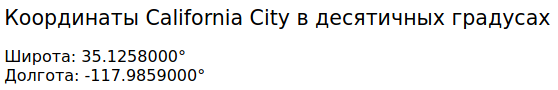

**longitude**

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0


In [ ]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0,1


In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [ ]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [ ]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

In [ ]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier


In [ ]:
df['longitude'].describe()

count    20640.000000
mean      -119.569308
std          2.003455
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

**latitude**

### 🧠 Упражнение: обработка выбросов в latitude

1. Создайте новый индикаторный признак `latitude_outlier`, который будет 1, если в признаке `latitude` есть выброс и 0, если выброса нет
2. Замените выбросы на медиану по `latitude`

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283
12772,-121.42,1327.13,NaN,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772


#### 🧠 Упражнение: обработка выбросов в latitude (ответ)


In [ ]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,1
12772,-121.42,1327.13,NaN,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1


In [ ]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,latitude_outlier


### Если не знаем, что является выбросами

**total_rooms**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [ ]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [ ]:
total_rooms_max_value = np.quantile(df['total_rooms'], q=0.99)
total_rooms_max_value

11212.11000000003

In [ ]:
total_rooms_min_value = np.quantile(df['total_rooms'], q=0.01)
total_rooms_min_value

164.0

In [ ]:
condition = (df['total_rooms'] > total_rooms_max_value) | (df['total_rooms'] < total_rooms_min_value)
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59,0,0,0,0
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61,0,0,0,0
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73,0,0,0,0
88,-122.27,37.80,10.0,105.0,42.0,125.0,39.0,0.9722,137500.0,NEAR BAY,88,0,0,0,0
92,-122.28,37.80,52.0,96.0,31.0,191.0,34.0,0.7500,162500.0,NEAR BAY,92,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,<1H OCEAN,20451,0,0,0,0
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502,0,0,0,0
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,INLAND,20530,0,0,0,0
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,20563,0,0,0,0


In [ ]:
df.loc[condition, 'total_rooms'] = df['total_rooms'].median()
df['total_rooms'].describe()

count    20640.000000
mean      2516.531492
std       1624.499191
min        164.000000
25%       1473.000000
50%       2127.000000
75%       3087.250000
max      11181.000000
Name: total_rooms, dtype: float64

## 5. Отбор и построение новых признаков

Исключаем признак "id"

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id', 'latitude_outlier'],
      dtype='object')

In [ ]:
df.drop(['id'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,latitude_outlier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'latitude_outlier'],
      dtype='object')

**Количественные переменные**

In [ ]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [ ]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категориальные переменные**<a class='anchor' id='category'>

Неколичественные строковые признаки всегда нужно переводить в числовое представление, так как многие модели машинного обучения не способны работать со строками.

Хороший обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: count, dtype: int64

Заменять строковые значения порядковыми числами не всегда хорошая идея

In [ ]:
1 < 2 < 3 < 4 < 5

True

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [ ]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
pd.get_dummies(df['ocean_proximity'])

,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
20635,False,False,True,False,False,False
20636,False,False,True,False,False,False
20637,False,False,True,False,False,False
20638,False,False,True,False,False,False


In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,latitude_outlier,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,15.579659,0.338217,False,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,12.951602,0.338105,False,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,18.445840,0.437991,False,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,17.209588,0.347265,False,False,False,False,True,False


**Б) Feature encoding**<a class='anchor' id='feature_encoding'>

Описание категории каким-то числом

In [ ]:
df_cat = df.groupby('ocean_proximity').mean()['total_rooms']
df_cat = pd.DataFrame(df_cat)

df_cat#.reset_index()

,total_rooms
ocean_proximity,
-,2251.739130
<1H OCEAN,2629.385998
INLAND,2717.165546
ISLAND,1574.600000
NEAR BAY,2493.076923
NEAR OCEAN,2585.395104


In [ ]:
df_cat = df.groupby('ocean_proximity', as_index=False).mean()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,-,2251.739130
1,<1H OCEAN,2629.385998
2,INLAND,2717.165546
3,ISLAND,1574.600000
4,NEAR BAY,2493.076923
5,NEAR OCEAN,2585.395104


In [ ]:
df_cat.rename(columns={'total_rooms': 'mean_rooms'}, inplace=True)

df_cat.sort_values(by='mean_rooms')

,ocean_proximity,mean_rooms
3,ISLAND,1574.600000
0,-,2251.739130
4,NEAR BAY,2493.076923
5,NEAR OCEAN,2585.395104
1,<1H OCEAN,2629.385998
2,INLAND,2717.165546


In [ ]:
df = df.merge(df_cat, on=['ocean_proximity'])

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,latitude_outlier,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,False,True,False,2493.076923
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,15.579659,0.338217,False,False,False,False,True,False,2493.076923
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,12.951602,0.338105,False,False,False,False,True,False,2493.076923


**В) Count encoding**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: count, dtype: int64

In [ ]:
from category_encoders.count import CountEncoder

cat_cols = ['ocean_proximity']

ce = CountEncoder()
ce.fit(df[cat_cols])
df[[i + '_count' for i in cat_cols]] = ce.transform(df[cat_cols])

df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms,ocean_proximity_count
14244,-120.74,39.90,23.0,1017.0,218.0,387.0,152.0,2.2656,88200.0,INLAND,...,21.435595,0.380531,False,False,True,False,False,False,2717.165546,6542
12615,-115.59,32.79,8.0,2183.0,307.0,1000.0,287.0,6.3814,159900.0,INLAND,...,14.063216,0.458085,False,False,True,False,False,False,2717.165546,6542
11370,-118.76,34.28,21.0,2786.0,342.0,1114.0,322.0,5.8578,266300.0,<1H OCEAN,...,12.275664,0.399856,False,True,False,False,False,False,2629.385998,9127
15288,-121.29,38.65,27.0,2744.0,464.0,1340.0,452.0,3.8816,147300.0,INLAND,...,16.909621,0.488338,False,False,True,False,False,False,2717.165546,6542
17645,-119.37,36.22,19.0,1673.0,318.0,1298.0,343.0,2.7060,64800.0,INLAND,...,19.007770,0.775852,False,False,True,False,False,False,2717.165546,6542


**Вещественные переменные**<a class='acnhor' id='numeric_feature'>

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

**A) Feature discretization** <a class='acnhor' id='feature_discretization'>

[Статья на эту тему](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...


In [ ]:
df['housing_median_age'].describe()

count    19918.000000
mean        28.653630
std         12.576796
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [ ]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [ ]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms,ocean_proximity_count,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,False,False,False,False,True,False,2493.076923,2288,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,False,False,False,False,True,False,2493.076923,2288,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,False,False,False,False,True,False,2493.076923,2288,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,False,False,False,False,True,False,2493.076923,2288,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,False,False,False,False,True,False,2493.076923,2288,4


In [ ]:
pd.cut(df['housing_median_age'], bins=4)

0        (39.25, 52.0]
1        (13.75, 26.5]
2        (39.25, 52.0]
3        (39.25, 52.0]
4        (39.25, 52.0]
             ...      
20635    (26.5, 39.25]
20636    (39.25, 52.0]
20637    (39.25, 52.0]
20638    (39.25, 52.0]
20639    (26.5, 39.25]
Name: housing_median_age, Length: 20640, dtype: category
Categories (4, interval[float64, right]): [(0.949, 13.75] < (13.75, 26.5] < (26.5, 39.25] <
                                           (39.25, 52.0]]

In [ ]:
pd.cut(df['housing_median_age'], bins=[df['housing_median_age'].min(), 5, 10, 25, df['housing_median_age'].max()])

0        (25.0, 52.0]
1        (10.0, 25.0]
2        (25.0, 52.0]
3        (25.0, 52.0]
4        (25.0, 52.0]
             ...     
20635    (25.0, 52.0]
20636    (25.0, 52.0]
20637    (25.0, 52.0]
20638    (25.0, 52.0]
20639    (25.0, 52.0]
Name: housing_median_age, Length: 20640, dtype: category
Categories (4, interval[float64, right]): [(1.0, 5.0] < (5.0, 10.0] < (10.0, 25.0] < (25.0, 52.0]]

**Б) Feature binarization** <a class='anchor' id='feature_binarization'>

[Статья на эту тему](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 1 признак

1 - новый дом,<br>0 - старый

In [ ]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1

    return X

In [ ]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,latitude_outlier,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0


## Обобщение
* Генерация новых признаков
    1. Категориальные признаки
        * Порядковые числа
        * pd.get_dummies
        * Feature Encoding
        * Count encoding
    2. Вещественные признаки
        * Feature discretization
        * Feature binarization
    3. Основываясь на логике задачи
    4. Автоматическая генерация фичей (к примеру, библиотека feature tools)

## 5. Сохранение результатов

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,latitude_outlier,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0


In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

In [ ]:
pd.read_csv(PREPARED_DATASET_PATH, sep=';')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,latitude_outlier,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mean_rooms,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0,0,False,False,False,True,False,2432.101399,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND,...,0,0,False,False,True,False,False,1574.600000,4,0
20636,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND,...,0,0,False,False,True,False,False,1574.600000,4,0
20637,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND,...,0,0,False,False,True,False,False,1574.600000,4,0
20638,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND,...,0,0,False,False,True,False,False,1574.600000,4,0


## 7. Подготовка данных в реальном проекте

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class DataPipeline:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None

    def fit(self, df):
        """Сохранение статистик"""

        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()

    def transform(self, df):
        """Трансформация данных"""

        # 1. Пропуски
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)


        # 2. Выбросы (outliers)
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median


        # 3. Новые фичи (features)

        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']

        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)

        return df

In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,False,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,False,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,False,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
id                     0
bedroom_share          0
population_per_room    0
-                      0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

##**Дополнительные материалы:**


1. Введение в numpy https://youtu.be/zac7brx4hyM
2. Введение в pandas https://youtu.be/gJKN8zyG5c0

*Обработка пропусков:*

1. https://www.kaggle.com/dansbecker/handling-missing-values
2. https://www.kaggle.com/twinkle0705/a-comprehensive-guide-to-handle-missing-values

*Выбросы:*

1. Обнаружение выбросов https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified
2. Продвинутые методики обработки выбросов https://www.kaggle.com/navinmundhra/advanced-outlier-handling-methods

*Техники генерации фичей:*

1. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 (В целом, как работать с данными, в том числе генерация признаков)
2. https://habr.com/ru/company/mlclass/blog/248129/ (Методы генерации фичей)

И можете попрактиковаться с pandas в небольшом курсе от kaggle с туториалами и проверяющими заданиями: https://www.kaggle.com/learn/pandas


**Дополнительные материалы про МЛ**:
1. Устройство проекта в машинном обучении https://youtu.be/LXc6gjip_oM
2. Типы данных https://youtu.be/c4Cg3TUIH0E
2. Какие задачи бывают в машинном обучении https://youtu.be/ku2oPMPht2I
1. Что делать с пропусками https://youtu.be/lg3H1Kd0E4o